### K-Means Clustering 
is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.
The real world applications of K-Means include:
- customer profiling
- market segmentation
- computer vision

and more


In [ ]:
#https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [2]:
# Let’s take a look at how we could go about classifying data using the K-Means algorithm with python. 
#As always, we need to start by importing the required libraries.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In this tutorial, we’ll generate our own data using the make_blobs function from the sklearn.datasets module. The centers parameter specifies the number of clusters.

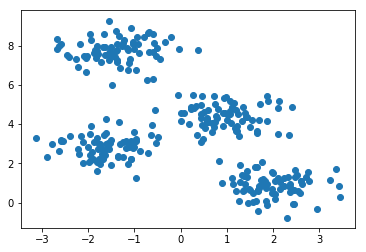

In [5]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the elbow method. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time.

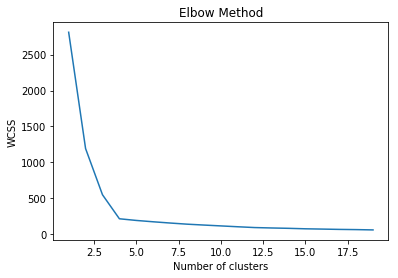

In [7]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# init : {‘k-means++’, ‘random’ or an ndarray}
# Method for initialization, defaults to ‘k-means++’:
# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
# ‘random’: choose k observations (rows) at random from data for the initial centroids.
# If an ndarray is passed, it should be of shape

# inertia_ : float
# Sum of squared distances of samples to their closest cluster center.

Next, we’ll categorize the data using the optimum number of clusters (4) we determined in the last step. k-means++ ensures that you get don’t fall into the random initialization trap.

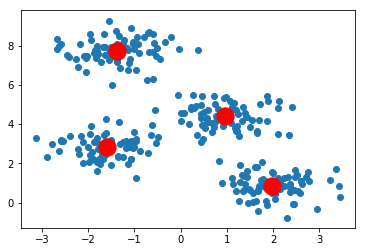

In [4]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()